In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [374]:
path=r'C:\Users\R726653\Downloads\YieldvsFFRData.xlsx'
df=pd.read_excel(path, parse_dates=True)
df.head()

,Date,Yield,FFR,MTGE
0,08/11/2022,2.87,2.33,5.420
1,08/10/2022,2.78,2.33,5.397
2,08/09/2022,2.80,2.33,5.351
3,08/08/2022,2.77,2.33,5.446
4,08/05/2022,2.83,2.33,5.442


In [377]:
ycurve=[]
effr=[]
mort=[]
for i in range(1,1257):
    ycurve.append(df['Yield'].iloc[i])
    effr.append(df['FFR'].iloc[i])
    mort.append(df['MTGE'].iloc[i])

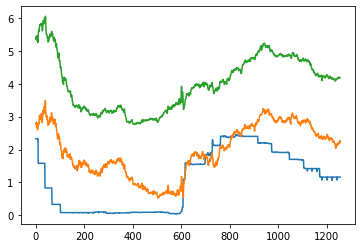

In [378]:
plt.plot(effr)
plt.plot(ycurve)
plt.plot(mort)

In [381]:
from scipy.stats import spearmanr
corr,_=spearmanr(effr, ycurve)
print("Correlation coeff of Effective Fed Funds Rate and 10 Yr Treausury Yield" ,corr)
corr1,_=spearmanr(ycurve, mort)
print("Correlation coeff of 10 Yr Treasury Yield and Mortgage Rates",corr1)
corr2,_=spearmanr(effr, mort)
print("Correlation coeff of Fed Funds Rate and Mortgage Rates",corr2)

Correlation coeff of Effective Fed Funds Rate and 10 Yr Treausury Yield 0.6771834060153028
Correlation coeff of 10 Yr Treasury Yield and Mortgage Rates 0.9425268676736096
Correlation coeff of Fed Funds Rate and Mortgage Rates 0.6726173466884784


In [384]:
from sklearn import linear_model

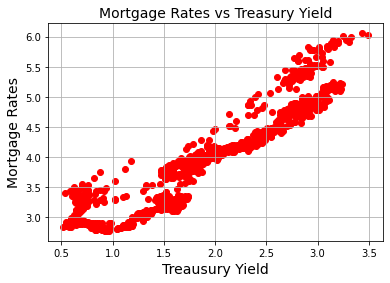

In [382]:
plt.scatter(df['Yield'], df['MTGE'], color='red')
plt.title('Mortgage Rates vs Treasury Yield', fontsize=14)
plt.xlabel('Treausury Yield', fontsize=14)
plt.ylabel('Mortgage Rates', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
pip install statsmodels

In [388]:
import statsmodels.api as sm

In [390]:
x=df[['Yield', 'FFR']]
y=df['MTGE']

regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)


Intercept: 
 2.127527861418618
Coefficients: 
 [0.9235394  0.06019014]
                            OLS Regression Results                            
Dep. Variable:                   MTGE   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     4183.
Date:                Mon, 15 Aug 2022   Prob (F-statistic):               0.00
Time:                        17:48:29   Log-Likelihood:                -255.54
No. Observations:                1257   AIC:                             517.1
Df Residuals:                    1254   BIC:                             532.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

In [391]:
def forecastMtge(ffr, curve):
    rate= ( 2.127527861418618 + (ffr* 0.9235394) + (curve*0.06019014))
    return rate

In [401]:
yc=2.87
f=2.33
results=[]
futureFFR=[]
futureYC=[]
for i in range (300):
    results.append(forecastMtge(f, yc))
    futureFFR.append(f)
    futureYC.append(yc)
    yc= yc+.005
    f=f+.005

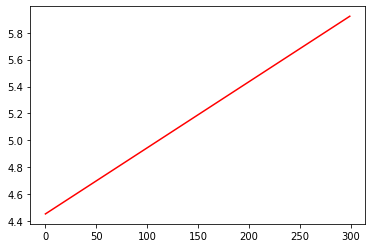

In [404]:
plt.plot(results, color="red")

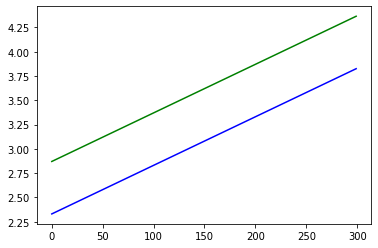

In [405]:
plt.plot(futureFFR, color="blue" )
plt.plot(futureYC, color="green")

In [406]:
print(results[:10])

[4.452120365218619, 4.457039012918618, 4.4619576606186175, 4.466876308318618, 4.471794956018618, 4.4767136037186175, 4.481632251418618, 4.486550899118617, 4.4914695468186165, 4.496388194518618]
